In [77]:
#import libraries  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [78]:
# Read each CSV file
df1 = pd.read_csv(r'C:\Users\USER\Desktop\Tedprime\3mtt\country_wise_latest.csv')
df2 = pd.read_csv(r'C:\Users\USER\Desktop\Tedprime\3mtt\covid_19_clean_complete.csv')
df3 = pd.read_csv(r'C:\Users\USER\Desktop\Tedprime\3mtt\day_wise.csv')
df4 = pd.read_csv(r'C:\Users\USER\Desktop\Tedprime\3mtt\full_grouped.csv')
df5 = pd.read_csv(r'C:\Users\USER\Desktop\Tedprime\3mtt\usa_county_wise.csv')
df6 = pd.read_csv(r'C:\Users\USER\Desktop\Tedprime\3mtt\worldometer_data.csv')

# Concatenate all DataFrames into one
# merged_df = pd.concat([df1, df2, df3, df4,df5,df6], ignore_index=True)
# merged_df

In [79]:
# confirmed = Death + Active + Recoverd

In [80]:
df3

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,22/01/2020,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,23/01/2020,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,24/01/2020,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,25/01/2020,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,26/01/2020,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13
...,...,...,...,...,...,...,...,...,...,...,...,...
183,23/07/2020,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187
184,24/07/2020,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187
185,25/07/2020,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187
186,26/07/2020,16251796,648621,9293464,6309711,204606,4104,134721,3.99,57.18,6.98,187


In [81]:
df3.columns

Index(['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries'],
      dtype='object')

In [82]:
df6

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,Afghanistan,Asia,39009447.0,36896,NaN,1298.0,NaN,25840.0,NaN,9758.0,31.0,946.0,33.0,90396.0,2317.0,EasternMediterranean
1,Albania,Europe,2877470.0,6016,NaN,188.0,NaN,3155.0,NaN,2673.0,23.0,2091.0,65.0,38997.0,13553.0,Europe
2,Algeria,Africa,43926079.0,33626,NaN,1273.0,NaN,23238.0,NaN,9115.0,57.0,766.0,29.0,NaN,NaN,Africa
3,Andorra,Europe,77278.0,944,NaN,52.0,NaN,828.0,NaN,64.0,1.0,12216.0,673.0,3750.0,48526.0,Europe
4,Angola,Africa,32956300.0,1483,NaN,64.0,NaN,520.0,NaN,899.0,20.0,45.0,2.0,64747.0,1965.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Vietnam,Asia,97425470.0,747,NaN,10.0,NaN,392.0,NaN,345.0,NaN,8.0,0.1,482456.0,4952.0,WesternPacific
205,Western Sahara,Africa,598682.0,10,NaN,1.0,NaN,8.0,NaN,1.0,NaN,17.0,2.0,NaN,NaN,Africa
206,Yemen,Asia,29886897.0,1768,NaN,508.0,NaN,898.0,NaN,362.0,NaN,59.0,17.0,120.0,4.0,EasternMediterranean
207,Zambia,Africa,18430129.0,7164,NaN,199.0,NaN,5786.0,NaN,1179.0,NaN,389.0,11.0,90307.0,4900.0,Africa


In [83]:
df6.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

In [84]:
df6 = df6.drop(['Continent'], axis = 1)
df6

,Country/Region,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,Afghanistan,39009447.0,36896,NaN,1298.0,NaN,25840.0,NaN,9758.0,31.0,946.0,33.0,90396.0,2317.0,EasternMediterranean
1,Albania,2877470.0,6016,NaN,188.0,NaN,3155.0,NaN,2673.0,23.0,2091.0,65.0,38997.0,13553.0,Europe
2,Algeria,43926079.0,33626,NaN,1273.0,NaN,23238.0,NaN,9115.0,57.0,766.0,29.0,NaN,NaN,Africa
3,Andorra,77278.0,944,NaN,52.0,NaN,828.0,NaN,64.0,1.0,12216.0,673.0,3750.0,48526.0,Europe
4,Angola,32956300.0,1483,NaN,64.0,NaN,520.0,NaN,899.0,20.0,45.0,2.0,64747.0,1965.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Vietnam,97425470.0,747,NaN,10.0,NaN,392.0,NaN,345.0,NaN,8.0,0.1,482456.0,4952.0,WesternPacific
205,Western Sahara,598682.0,10,NaN,1.0,NaN,8.0,NaN,1.0,NaN,17.0,2.0,NaN,NaN,Africa
206,Yemen,29886897.0,1768,NaN,508.0,NaN,898.0,NaN,362.0,NaN,59.0,17.0,120.0,4.0,EasternMediterranean
207,Zambia,18430129.0,7164,NaN,199.0,NaN,5786.0,NaN,1179.0,NaN,389.0,11.0,90307.0,4900.0,Africa


In [85]:
# To check missing value in df6 
df6.isna().sum()

Country/Region        0
Population            1
TotalCases            0
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
WHO Region           25
dtype: int64

In [86]:
# To remove the blank from the population column
df6 = df6.dropna(subset=['Population']) 

In [87]:
# To replace the blank from the other columns
# df6.fillna(0, inplace=True)

In [88]:
# To check again the missing value  in df6 
df6.isna().sum()

Country/Region        0
Population            0
TotalCases            0
NewCases            204
TotalDeaths          21
NewDeaths           205
TotalRecovered        4
NewRecovered        205
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      0
Deaths/1M pop        21
TotalTests           17
Tests/1M pop         17
WHO Region           24
dtype: int64

In [89]:
df6['WHO Region'].fillna('unknown', inplace=True)
df6['NewCases'].fillna(0, inplace=True)
df6['TotalDeaths'].fillna(0, inplace=True)
df6['NewDeaths'].fillna(0, inplace=True)
df6['TotalRecovered'].fillna(0, inplace=True)
df6['NewRecovered'].fillna(0, inplace=True)
df6['ActiveCases'].fillna(0, inplace=True)
df6['Serious,Critical'].fillna(0, inplace=True)
df6['Deaths/1M pop'].fillna(0, inplace=True)
df6['TotalTests'].fillna(0, inplace=True)
df6['Tests/1M pop'].fillna(0, inplace=True)

In [90]:
# To check the clean df6 again
df6.isna().sum()

Country/Region      0
Population          0
TotalCases          0
NewCases            0
TotalDeaths         0
NewDeaths           0
TotalRecovered      0
NewRecovered        0
ActiveCases         0
Serious,Critical    0
Tot Cases/1M pop    0
Deaths/1M pop       0
TotalTests          0
Tests/1M pop        0
WHO Region          0
dtype: int64

In [91]:
# Standardize Date format
df3["Date"] = pd.to_datetime(df3["Date"], format='%d/%m/%Y', errors='coerce')
df3

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13
...,...,...,...,...,...,...,...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187
186,2020-07-26,16251796,648621,9293464,6309711,204606,4104,134721,3.99,57.18,6.98,187


In [92]:
# Standardize Country names
df6["Country/Region"] = df6["Country/Region"].str.title()
df6

,Country/Region,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,Afghanistan,39009447.0,36896,0.0,1298.0,0.0,25840.0,0.0,9758.0,31.0,946.0,33.0,90396.0,2317.0,EasternMediterranean
1,Albania,2877470.0,6016,0.0,188.0,0.0,3155.0,0.0,2673.0,23.0,2091.0,65.0,38997.0,13553.0,Europe
2,Algeria,43926079.0,33626,0.0,1273.0,0.0,23238.0,0.0,9115.0,57.0,766.0,29.0,0.0,0.0,Africa
3,Andorra,77278.0,944,0.0,52.0,0.0,828.0,0.0,64.0,1.0,12216.0,673.0,3750.0,48526.0,Europe
4,Angola,32956300.0,1483,0.0,64.0,0.0,520.0,0.0,899.0,20.0,45.0,2.0,64747.0,1965.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Vietnam,97425470.0,747,0.0,10.0,0.0,392.0,0.0,345.0,0.0,8.0,0.1,482456.0,4952.0,WesternPacific
205,Western Sahara,598682.0,10,0.0,1.0,0.0,8.0,0.0,1.0,0.0,17.0,2.0,0.0,0.0,Africa
206,Yemen,29886897.0,1768,0.0,508.0,0.0,898.0,0.0,362.0,0.0,59.0,17.0,120.0,4.0,EasternMediterranean
207,Zambia,18430129.0,7164,0.0,199.0,0.0,5786.0,0.0,1179.0,0.0,389.0,11.0,90307.0,4900.0,Africa


In [93]:
df3['Daily Growth Rate (Confirmed)'] = (df3['New cases'] / df3['Confirmed']) * 100
df3['Daily Growth Rate (Confirmed)']

0       0.000000
1      15.137615
2      30.499469
3      34.379358
4      32.294618
         ...    
183     1.823000
184     1.780460
185     1.592459
186     1.258975
187     1.387659
Name: Daily Growth Rate (Confirmed), Length: 188, dtype: float64

In [94]:
df3['Daily Growth Rate (Deaths)'] = (df3['New deaths'] / df3['Deaths']) * 100
df3['Daily Growth Rate (Deaths)']

0       0.000000
1       5.555556
2      30.769231
3      38.095238
4      25.000000
         ...    
183     1.573150
184     0.960525
185     0.755139
186     0.632727
187     0.827936
Name: Daily Growth Rate (Deaths), Length: 188, dtype: float64

In [95]:
df3['Daily Growth Rate (Recovered)'] = (df3['New recovered'] / df3['Recovered']) * 100
df3['Daily Growth Rate (Recovered)']

0       0.000000
1       6.666667
2      16.666667
3       7.692308
4      25.000000
         ...    
183     1.948279
184     2.558653
185     2.391573
186     1.449632
187     1.844332
Name: Daily Growth Rate (Recovered), Length: 188, dtype: float64

In [96]:
# df3['Mortality Ratio'] = (df3['Deaths'] / df3['Confirmed']) * 100
# df3['Mortality Ratio']

In [97]:
df6.dtypes

Country/Region       object
Population          float64
TotalCases            int64
NewCases            float64
TotalDeaths         float64
NewDeaths           float64
TotalRecovered      float64
NewRecovered        float64
ActiveCases         float64
Serious,Critical    float64
Tot Cases/1M pop    float64
Deaths/1M pop       float64
TotalTests          float64
Tests/1M pop        float64
WHO Region           object
dtype: object

In [98]:
df6['Cases per 100K Population'] = (df6['TotalCases'] / df6['Population']) * 1e5
df6['Cases per 100K Population']

0        94.582217
1       209.072553
2        76.551335
3      1221.563705
4         4.499898
          ...     
204       0.766740
205       1.670336
206       5.915636
207      38.871133
208      29.152496
Name: Cases per 100K Population, Length: 208, dtype: float64

In [99]:
df6['Deaths per 100K Population'] = (df6['TotalDeaths'] / df6['Population']) * 1e5
df6['Deaths per 100K Population']

0       3.327399
1       6.533517
2       2.898051
3      67.289526
4       0.194197
         ...    
204     0.010264
205     0.167034
206     1.699742
207     1.079754
208     0.564372
Name: Deaths per 100K Population, Length: 208, dtype: float64

In [100]:
# Group the data by Date and sum up the values for each date
daily_trends = df3.groupby('Date').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum'
}).reset_index()
daily_trends

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,555,17,28
1,2020-01-23,654,18,30
2,2020-01-24,941,26,36
3,2020-01-25,1434,42,39
4,2020-01-26,2118,56,52
...,...,...,...,...
183,2020-07-23,15510481,633506,8710969
184,2020-07-24,15791645,639650,8939705
185,2020-07-25,16047190,644517,9158743
186,2020-07-26,16251796,648621,9293464


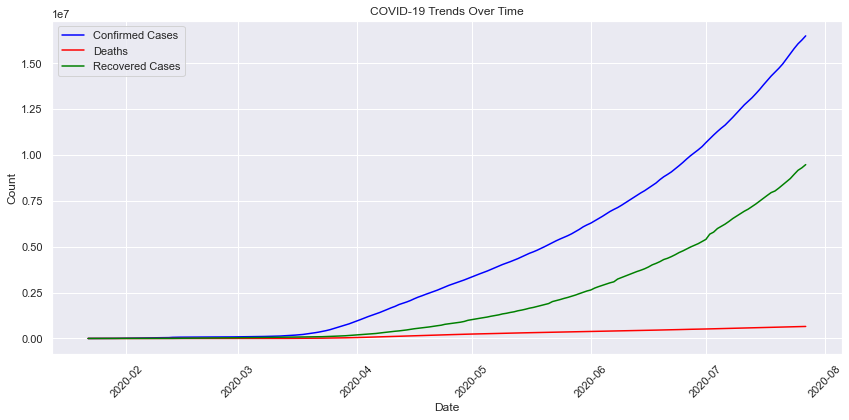

In [101]:
# Plotting the line plot for confirmed cases, deaths, and recoveries over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_trends, x='Date', y='Confirmed', label='Confirmed Cases', color='blue')
sns.lineplot(data=daily_trends, x='Date', y='Deaths', label='Deaths', color='red')
sns.lineplot(data=daily_trends, x='Date', y='Recovered', label='Recovered Cases', color='green')

plt.title('COVID-19 Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [102]:
# Calculate the Mortality Ratio (Death rate / Confirmed cases rate) for each day
daily_trends['Mortality Ratio'] = (daily_trends['Deaths'] / daily_trends['Confirmed']) * 100
daily_trends['Mortality Ratio']


0      3.063063
1      2.752294
2      2.763018
3      2.928870
4      2.644004
         ...   
183    4.084374
184    4.050560
185    4.016385
186    3.991073
187    3.968548
Name: Mortality Ratio, Length: 188, dtype: float64

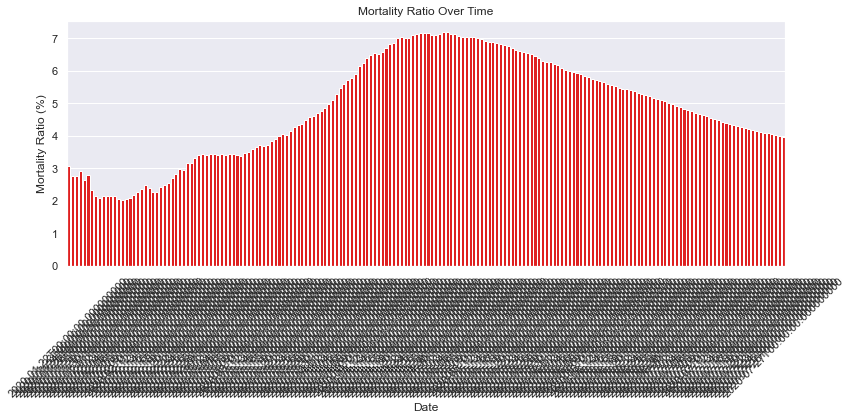

In [103]:
# Plotting the mortality ratio over time
plt.figure(figsize=(12, 6))
sns.barplot(x=daily_trends['Date'], y=daily_trends['Mortality Ratio'], color='red')

plt.title('Mortality Ratio Over Time')
plt.xlabel('Date')
plt.ylabel('Mortality Ratio (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

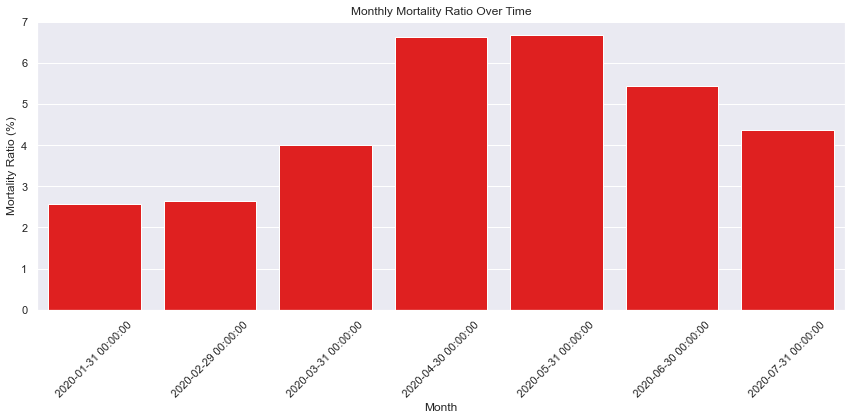

In [104]:
monthly_trends = daily_trends.set_index('Date').resample('M').mean()
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_trends.index, y=monthly_trends['Mortality Ratio'], color='red')

plt.title('Monthly Mortality Ratio Over Time')
plt.xlabel('Month')
plt.ylabel('Mortality Ratio (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

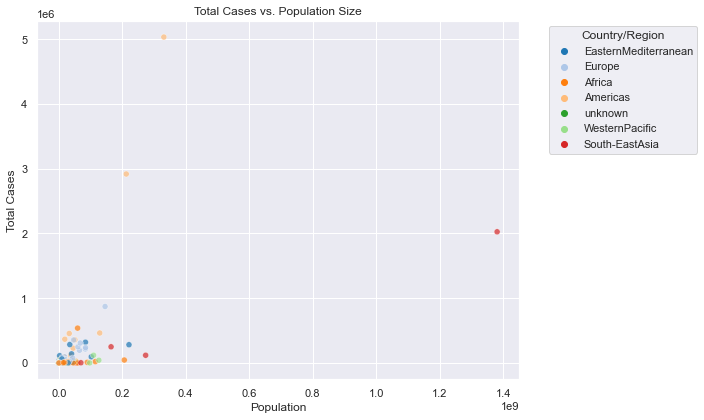

In [105]:
# Plotting the Total cases vs. population for each WHO Region
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Population', y='TotalCases', data=df6, hue='WHO Region', palette='tab20', alpha=0.7)

plt.title('Total Cases vs. Population Size')
plt.xlabel('Population')
plt.ylabel('Total Cases')
plt.legend(title='Country/Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [106]:
data_dummy = df6.copy()
data_dummy[ 'WHO Region'] = data_dummy[ 'WHO Region'].map({'EasternMediterranean': 1,
                                                                             'Europe': 2,'Africa': 3,
                                                                            'Americas': 4,'unknown': 5,
                                                                            'WesternPacific': 6,'South-EastAsia': 7})
data_dummy

,Country/Region,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,Cases per 100K Population,Deaths per 100K Population
0,Afghanistan,39009447.0,36896,0.0,1298.0,0.0,25840.0,0.0,9758.0,31.0,946.0,33.0,90396.0,2317.0,1,94.582217,3.327399
1,Albania,2877470.0,6016,0.0,188.0,0.0,3155.0,0.0,2673.0,23.0,2091.0,65.0,38997.0,13553.0,2,209.072553,6.533517
2,Algeria,43926079.0,33626,0.0,1273.0,0.0,23238.0,0.0,9115.0,57.0,766.0,29.0,0.0,0.0,3,76.551335,2.898051
3,Andorra,77278.0,944,0.0,52.0,0.0,828.0,0.0,64.0,1.0,12216.0,673.0,3750.0,48526.0,2,1221.563705,67.289526
4,Angola,32956300.0,1483,0.0,64.0,0.0,520.0,0.0,899.0,20.0,45.0,2.0,64747.0,1965.0,3,4.499898,0.194197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Vietnam,97425470.0,747,0.0,10.0,0.0,392.0,0.0,345.0,0.0,8.0,0.1,482456.0,4952.0,6,0.766740,0.010264
205,Western Sahara,598682.0,10,0.0,1.0,0.0,8.0,0.0,1.0,0.0,17.0,2.0,0.0,0.0,3,1.670336,0.167034
206,Yemen,29886897.0,1768,0.0,508.0,0.0,898.0,0.0,362.0,0.0,59.0,17.0,120.0,4.0,1,5.915636,1.699742
207,Zambia,18430129.0,7164,0.0,199.0,0.0,5786.0,0.0,1179.0,0.0,389.0,11.0,90307.0,4900.0,3,38.871133,1.079754


In [111]:
data_dummy['WHO Region'].unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

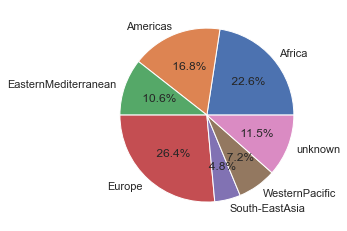

In [110]:
pp=df6.groupby('WHO Region')['TotalDeaths'].count()
plt.pie(pp,labels=pp.index,autopct='%5.1f%%')
plt.show()

In [113]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Apply standardization
numerical_columns = ['Population', 'TotalCases', 'NewCases', 'TotalDeaths',
       'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases',
       'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests',
       'Tests/1M pop']

df6[numerical_columns] = scaler.fit_transform(df6[numerical_columns])

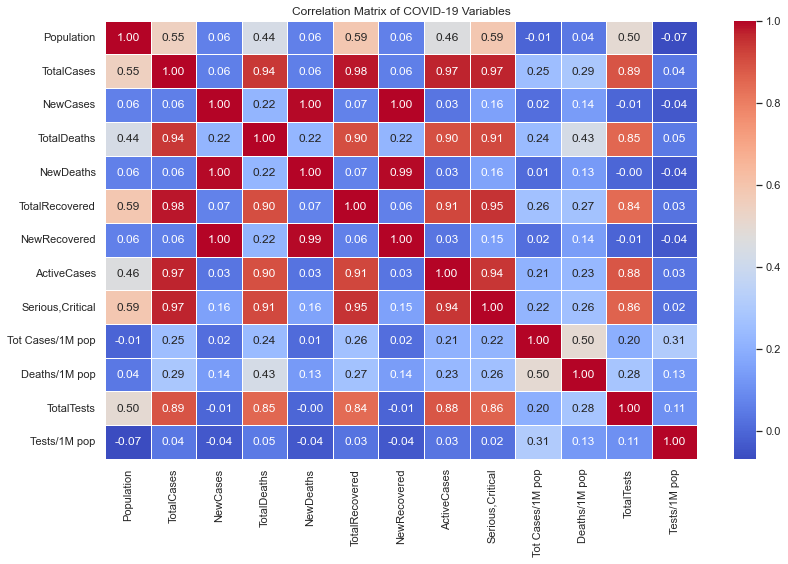

In [114]:
# Calculate correlation matrix for numerical columns
correlation_matrix = data_dummy[numerical_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix of COVID-19 Variables')
plt.tight_layout()
plt.show()


In [120]:
# Create a binary target variable for classification (1 if deaths increased, 0 if not
# To predict whether the number of death will increase compared to the previous day.
data_dummy['Death Increase'] = (data_dummy['TotalDeaths'] > data_dummy['TotalDeaths'].shift(1)).astype(int)
data_dummy['Death Increase']

0      0
1      0
2      1
3      0
4      1
      ..
204    0
205    0
206    1
207    0
208    0
Name: Death Increase, Length: 208, dtype: int32

In [121]:
data_dummy['Death Increase'].unique() 

array([0, 1])

In [122]:
# Drop rows with NaN in the target or features (especially for the first row)
data_dummy.dropna(subset=['Death Increase'], inplace=True)

# Features and target variable
features = ['Population',  'TotalCases','TotalRecovered', 'ActiveCases', 'TotalTests']
X = data_dummy[features]
y = data_dummy['Death Increase']

In [123]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (optional but often beneficial for many ML models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [149]:
# Initialize the XGBoost classifier
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train_scaled, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [125]:
# Split the data into training and testing sets
X_train_1, X_test, y_train_1, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train_1, y_train_1, test_size=0.2, random_state=42)
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [126]:
# Create an XGBoost classifier and fit it to the training data
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)
# Make predictions on the validation data
predictions = xgb_model.predict(X_valid_scaled)

In [131]:
# Use the trained model to make predictions on the test data
X_test_scaled = scaler.transform(X_test)
predictions_test = xgb_model.predict(X_test_scaled)

In [132]:
# Evaluate the model
accuracy = accuracy_score(y_valid, predictions)
print(f'Accuracy on validation set: {accuracy:.2f}')
print(classification_report(y_valid, predictions))

Accuracy on validation set: 0.56
              precision    recall  f1-score   support

           0       0.63      0.60      0.62        20
           1       0.47      0.50      0.48        14

    accuracy                           0.56        34
   macro avg       0.55      0.55      0.55        34
weighted avg       0.56      0.56      0.56        34



In [133]:
# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, predictions_test)
print(f'Accuracy on test set: {accuracy_test:.2f}')
print(classification_report(y_test, predictions_test))

Accuracy on test set: 0.62
              precision    recall  f1-score   support

           0       0.57      0.68      0.62        19
           1       0.68      0.57      0.62        23

    accuracy                           0.62        42
   macro avg       0.62      0.62      0.62        42
weighted avg       0.63      0.62      0.62        42



In [152]:
def plot_confusion_matrix(model, X_test, y_test, classes=None, normalize=False, title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Plotting confusion matrix.

    model: Trained classifier
    X_test: Test features
    y_test: True labels of the test set
    classes: List of class names (default None)
    normalize: Whether to normalize the confusion matrix (default False)
    title: Title of the plot (default 'Confusion matrix')
    cmap: Color map for the plot (default plt.cm.Blues)
    """

     # Generate predictions
    y_pred = model.predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    if classes is None:
        classes = np.unique(y_test)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized ' + title.lower()

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='.2f', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()


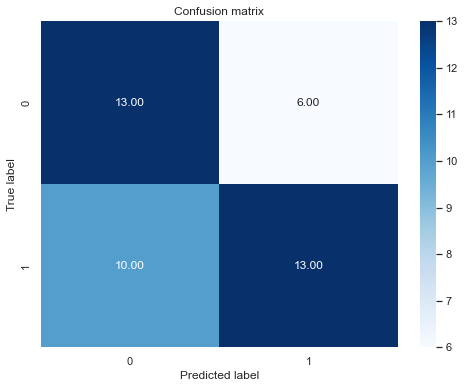

In [153]:
# Plot confusion matrix for test set
plot_confusion_matrix(xgb_model, X_test_scaled, y_test)

In [178]:
# hyperparameters 
xgb_model_tuned = XGBClassifier(
    eval_metric='logloss',
    random_state=42,
    learning_rate=0.1,  # Example learning rate
    n_estimators=100,   # Number of boosting rounds
    max_depth=6,        # Depth of the trees
    subsample=0.8,      # Fraction of samples to be used for each tree
    colsample_bytree=0.8  # Fraction of features used for each tree
)

# Train the model with tuned hyperparameters
xgb_model_tuned.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [179]:
# Evaluate the tuned model
y_pred_tuned = xgb_model_tuned.predict(X_test_scaled)

# Evaluate performance
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)

print(f'Tuned Accuracy: {accuracy_tuned:.4f}')
print(f'Tuned Precision: {precision_tuned:.4f}')
print(f'Tuned Recall: {recall_tuned:.4f}')
print(f'Tuned F1-Score: {f1_tuned:.4f}')


Tuned Accuracy: 0.6905
Tuned Precision: 0.7778
Tuned Recall: 0.6087
Tuned F1-Score: 0.6829


In [157]:
# Split the data into training and testing sets
X_train_1, X_test, y_train_1, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train_1, y_train_1, test_size=0.2, random_state=42)
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [170]:
# Create an XGBoost classifier and fit it to the training data
xgb_model_tuned = XGBClassifier(
    eval_metric='logloss',
    random_state=42,
    learning_rate=0.1,  # Example learning rate
    n_estimators=100,   # Number of boosting rounds
    max_depth=6,        # Depth of the trees
    subsample=0.8,      # Fraction of samples to be used for each tree
    colsample_bytree=0.8  # Fraction of features used for each tree
) 
xgb_model_tuned.fit(X_train_scaled, y_train)
# Make predictions on the validation data
prediction = xgb_model_tuned.predict(X_valid_scaled)

In [171]:
# Evaluate the model
accuracy = accuracy_score(y_valid, prediction)
print(f'Accuracy on validation set: {accuracy:.2f}')
print(classification_report(y_valid, prediction))

Accuracy on validation set: 0.65
              precision    recall  f1-score   support

           0       0.70      0.70      0.70        20
           1       0.57      0.57      0.57        14

    accuracy                           0.65        34
   macro avg       0.64      0.64      0.64        34
weighted avg       0.65      0.65      0.65        34



In [172]:
# Use the trained model to make predictions on the test data
X_test_scaled = scaler.transform(X_test)
prediction_test = xgb_model_tuned.predict(X_test_scaled)

In [173]:
# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, prediction_test)
print(f'Accuracy on test set: {accuracy_test:.2f}')
print(classification_report(y_test, prediction_test))

Accuracy on test set: 0.69
              precision    recall  f1-score   support

           0       0.62      0.79      0.70        19
           1       0.78      0.61      0.68        23

    accuracy                           0.69        42
   macro avg       0.70      0.70      0.69        42
weighted avg       0.71      0.69      0.69        42



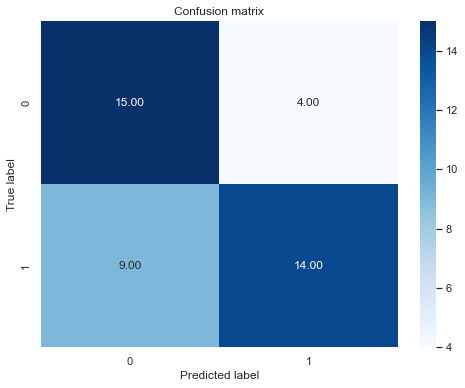

In [175]:
# Plot confusion matrix for test set
plot_confusion_matrix(xgb_model_tuned, X_test_scaled, y_test)

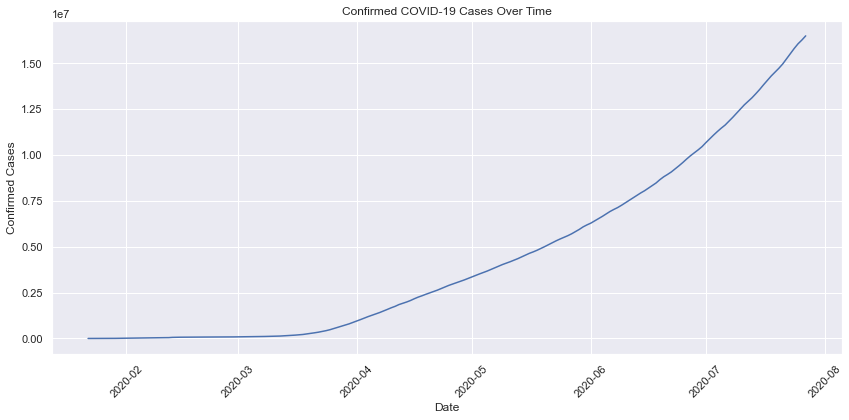

In [176]:
# Group data by Date and sum the values
daily_trends = df3.groupby('Date').agg({'Confirmed': 'sum'}).reset_index()

# Set the Date as the index for time series forecasting
daily_trends.set_index('Date', inplace=True)

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(daily_trends.index, daily_trends['Confirmed'], label='Confirmed Cases')
plt.title('Confirmed COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


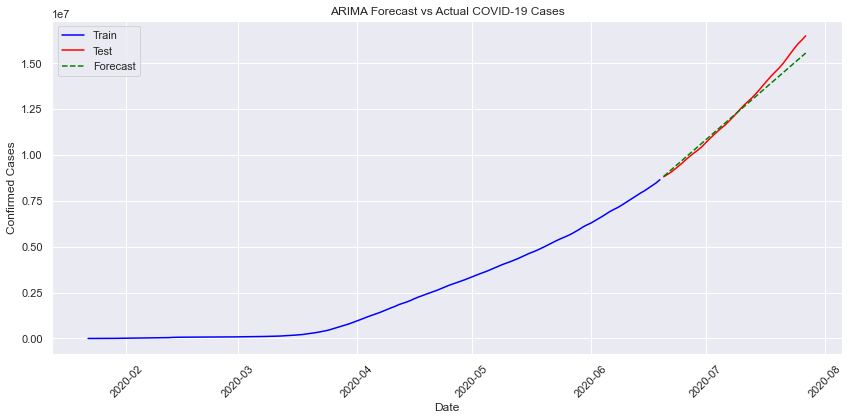

RMSE: 370148.2538


In [177]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Split data into training and testing sets (80% training, 20% testing)
train_size = int(len(daily_trends) * 0.8)
train, test = daily_trends[:train_size], daily_trends[train_size:]

# Fit ARIMA model (order is p=1, d=1, q=1 for simplicity)
arima_model = ARIMA(train, order=(2, 1, 1))
arima_fit = arima_model.fit()

# Make predictions
forecast = arima_fit.forecast(steps=len(test))
test['Forecast'] = forecast

# Plot the forecast vs actual
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Confirmed'], label='Train', color='blue')
plt.plot(test.index, test['Confirmed'], label='Test', color='red')
plt.plot(test.index, test['Forecast'], label='Forecast', color='green', linestyle='--')

plt.title('ARIMA Forecast vs Actual COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate RMSE (Root Mean Squared Error) for evaluation
rmse = np.sqrt(mean_squared_error(test['Confirmed'], test['Forecast']))
print(f'RMSE: {rmse:.4f}')


In [ ]:
# RMSE quantifies the average magnitude of errors in predictions (in the same unit as the target variable). 
#  The RMSE is quite large, suggesting that the classification metrics are strong .